In [1]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np
from astropy.table import Table, join

plt.style.use('seaborn')
plt.style.use('seaborn-notebook')

In [2]:
bruteforce_cpu = Table.read('/home/aalvarez/Work/Data/PV/Prod/lsst/75769/BruteCPU.fits', hdu=1)
bruteforce_gpu = Table.read('/home/aalvarez/Work/Data/PV/Prod/lsst/75769/BruteGPU.fits', hdu=1)
kdd = Table.read('/home/aalvarez/Work/Data/PV/Prod/lsst/75769/NnpzLsst/output_file.fits', hdu=1)

np.testing.assert_array_equal(bruteforce_cpu['OBJECT_ID'], bruteforce_gpu['OBJECT_ID'])
np.testing.assert_array_equal(bruteforce_cpu['OBJECT_ID'], kdd['OBJECT_ID'])

In [3]:
cross = join(bruteforce_cpu, bruteforce_gpu, 'OBJECT_ID', table_names=['cpu', 'gpu'])
cross_kdd = join(bruteforce_cpu, kdd, 'OBJECT_ID', table_names=['cpu', 'kdd'])

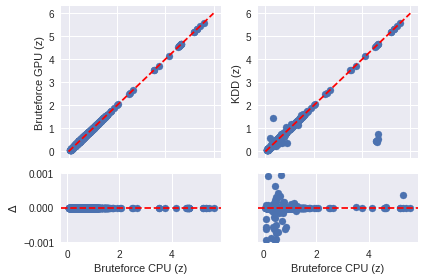

In [4]:
gs = GridSpec(ncols=2, nrows=3)

plt.figure()
brute_scatter_ax = plt.subplot(gs[0:2, 0])
brute_scatter_ax.scatter(cross['REDSHIFT_MEDIAN_cpu'], cross['REDSHIFT_MEDIAN_gpu'])
brute_scatter_ax.set_ylabel('Bruteforce GPU (z)')
brute_scatter_ax.plot([0, 6], [0, 6], '--', color='red')
brute_scatter_ax.set_xticklabels([])

brute_delta_ax = plt.subplot(gs[2, 0])
brute_delta_ax.scatter(cross['REDSHIFT_MEDIAN_cpu'], cross['REDSHIFT_MEDIAN_gpu']-cross['REDSHIFT_MEDIAN_cpu'])
brute_delta_ax.axhline(0, linestyle='--', color='red')
brute_delta_ax.set_ylim(-0.001, 0.001)
brute_delta_ax.set_ylabel('$\\Delta$')
brute_delta_ax.set_xlabel('Bruteforce CPU (z)')

kdd_scatter_ax = plt.subplot(gs[0:2, 1])
kdd_scatter_ax.scatter(cross_kdd['REDSHIFT_MEDIAN_cpu'], cross_kdd['REDSHIFT_MEDIAN_kdd'])
kdd_scatter_ax.plot([0, 6], [0, 6], '--', color='red')
kdd_scatter_ax.set_xticklabels([])
kdd_scatter_ax.set_ylabel('KDD (z)')

kdd_delta_ax = plt.subplot(gs[2, 1])
kdd_delta_ax.scatter(cross_kdd['REDSHIFT_MEDIAN_cpu'], cross_kdd['REDSHIFT_MEDIAN_kdd']-cross_kdd['REDSHIFT_MEDIAN_cpu'])
kdd_delta_ax.axhline(0, linestyle='--', color='red')
kdd_delta_ax.set_ylim(-0.001, 0.001)

kdd_delta_ax.set_xlabel('Bruteforce CPU (z)')
kdd_delta_ax.set_yticklabels([])

plt.tight_layout()
plt.show()

In [5]:
(cross['NEIGHBOR_IDS_cpu'] == cross['NEIGHBOR_IDS_gpu']).all()

True

In [6]:
np.allclose(cross['NEIGHBOR_WEIGHTS_cpu'], cross['NEIGHBOR_WEIGHTS_gpu'])

True